# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [222]:
from src.Lab_2_4_LR2 import LinearRegressor



**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [223]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [224]:
linreg = LinearRegressor()
linreg.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [225]:
from src.Lab_2_4_LR2 import evaluate_regression

In [226]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275276, 'RMSE': 1.012647295683223, 'MAE': 0.8945454545454539}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [227]:
data = pd.read_csv("../data/synthetic_dataset.csv")

X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [228]:
model = LinearRegressor()              # Crear instancia del modelo
model.fit(X, y, method="least_squares")  

In [229]:
y_pred = model.predict(X)       
metrics = evaluate_regression(y, y_pred)
print("R^2  =", metrics["R2"])
print("RMSE =", metrics["RMSE"])
print("MAE  =", metrics["MAE"])

R^2  = 0.5452814241832913
RMSE = 3.1936452748702813
MAE  = 2.237394521024784


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

Histograma de los residuos:
Sirve para ver cómo se reparten los errores. Lo ideal es que estén centrados en cero y se parezcan a una forma normal (sin colas muy largas).

Gráfico Q-Q (cuantiles-cuantiles):
Compara los residuos con lo que se esperaría de una distribución normal. Si los puntos siguen la diagonal, van bien; si se desvían mucho, podría haber sesgo o colas raras.

Dispersión de residuos vs. valores reales (y_true):
Muestra si los errores cambian cuando cambian los valores reales. Si los residuos aumentan a la par que y_true, puede indicar problemas como varianza no constante.

Dispersión de residuos vs. predicciones:
Revisa si el modelo subestima o sobreestima en ciertas zonas de predicción. Lo deseable es no ver ningún patrón definido, sino más bien una nube de puntos.

Dispersión de residuos vs. cada variable de entrada:
Ayuda a detectar si falta alguna relación que el modelo no capturó (por ejemplo, un comportamiento curvo). Si ves un patrón claro, puede que haga falta un término no lineal o alguna interacción en el modelo

In [230]:


def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame. 
    - Creates a histogram of residuals
    - Creates a Q-Q plot of residuals
    - Creates scatterplots of residuals vs. true output, predictions, 
      and each input variable (for quick diagnostic checks).
    
    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output (true target) column.
        prediction_column (str): The name of the prediction column.
    """

    # 1) Calculate residuals = y_true - y_pred
    residuals = data[output_column] - data[prediction_column]

    # We have "num_features" columns left if we exclude output and prediction
    num_features = len(data.columns) - 2
    total_plots = num_features + 4

    num_rows = int(np.ceil(np.sqrt(total_plots)))
    num_cols = int(np.ceil(total_plots / num_rows))

    plt.figure(figsize=(5 * num_cols, 4 * num_rows))

    # 2) Histogram of residuals
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor="black")
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")

    # 3) Q-Q plot of residuals
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")

    # 4) Residuals vs True Output
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(data[output_column], residuals, alpha=0.5)
    plt.title("Residuals vs True Output")
    plt.xlabel("True Output")
    plt.ylabel("Residuals")

    # 5) Residuals vs Predictions
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)
    plt.title("Residuals vs Predictions")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")

    # 6) Residuals vs each input variable
    #    (we assume any other column besides output_column and prediction_column is an input feature)
    plot_index = 5
    for col in data.columns:
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, plot_index)
            plt.scatter(data[col], residuals, alpha=0.5)
            plt.title(f"Residuals vs {col}")
            plt.xlabel(col)
            plt.ylabel("Residuals")
            plot_index += 1

    plt.tight_layout()
    plt.show()


Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: {'Intercept': 3.5783726939490377, 'Input1': 0.0027978234056358397, 'Input2': 0.047817514899444885, 'Input3': 1.6500282902062153}


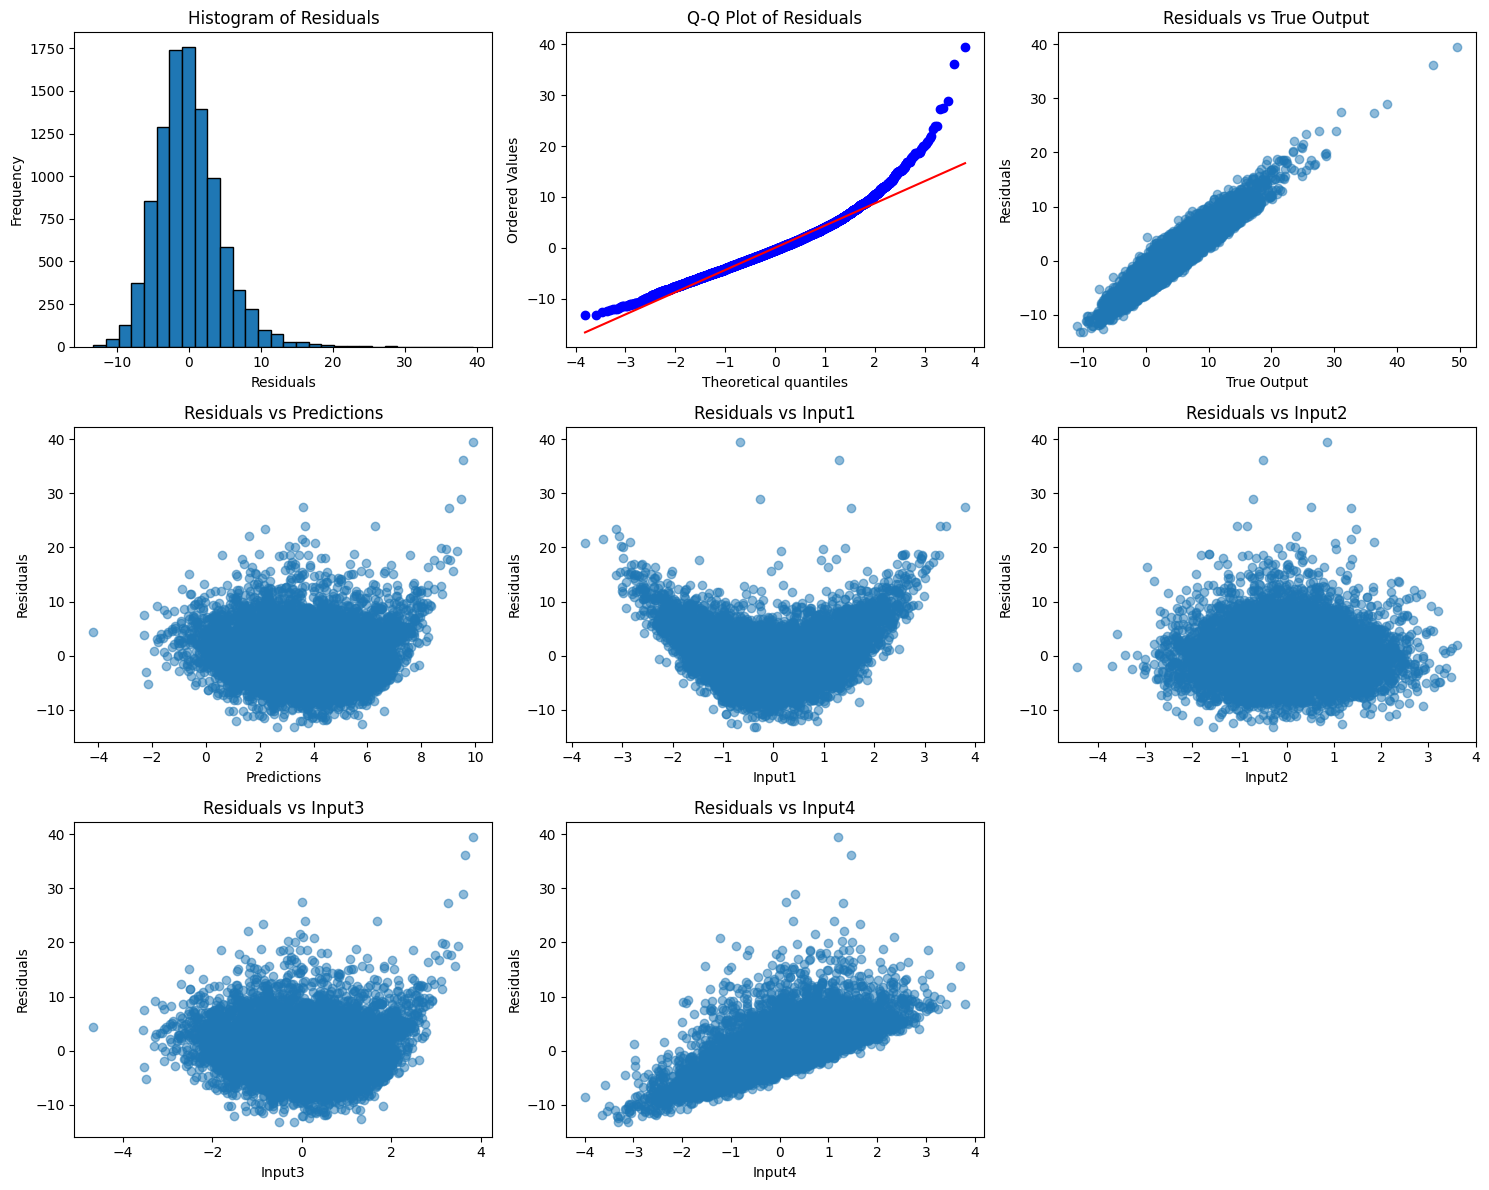

In [231]:
# 1) Build X, y from the DataFrame
X = data[["Input1", "Input2", "Input3"]].values  # 3 features
y = data["Output"].values

# 2) Fit the model
linreg.fit(X, y)

# 3) Build coef_dict
feature_names = ["Input1", "Input2", "Input3"]
coef_dict = {"Intercept": linreg.intercept}
for i, feat in enumerate(feature_names):
    coef_dict[feat] = linreg.coefficients[i]
print("Coefficients of the model:", coef_dict)

# 4) Predict and plot residuals
data["Predictions"] = linreg.predict(X)
plot_residuals(data, "Output", "Predictions")



**What are we seeing here? Is there any way to improve the model?**
>Histograma y Q-Q Plot de residuos:
Si en el histograma no se ve centrado en cero o el Q-Q plot muestra mucha desviación de la línea diagonal, significa que los errores no son “normales” y podrían tener sesgos o colas largas.

Residuos vs. Predicciones:
Si aparece una forma clara , indica que el modelo está fallando de manera sistemática en ciertos rangos de predicción.

Residuos vs. cada variable de entrada:
Si ves patrones en los gráficos (como curvas), el modelo lineal no está capturando la relación real. Puede que necesites términos polinómicos o alguna transformación (log, exponencial) para ajustarse mejor a los datos.
Formas de mejorar el modelo:

Transformar variables (añadir potencias, logaritmos, etc.).
Probar modelos más complejos (árboles de decisión, bosques aleatorios, etc.) que capturen no linealidades.
Regularizar o eliminar outliers, si corresponde

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [232]:
# Let's assume Input1 needs a quadratic term (degree 2),
# and Input2 is replaced by an exponential of input3.
# Of course, you can change the exponent if you suspect cubic (3), quartic (4), etc.

data_transf = pd.DataFrame({
    'Input1': data['Input1']**2,    # Quadratic term
    'Input2': np.exp(data['Input2']),  # Exponential term
    'Input3': data['Input3'],       # Keep as-is
    'Output': data['Output']        # Target column
})

X_transf = data_transf.iloc[:, :3].values  # first 3 columns (the features)
y = data_transf['Output'].values          # last column is 'Output'

linreg = LinearRegressor()
linreg.fit(X_transf, y, method="least_squares")

y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print("Evaluation metrics:", evaluation_metrics)


Evaluation metrics: {'R2': 0.4621000881626117, 'RMSE': 3.473490096618895, 'MAE': 2.6896827878657517}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> Observamos que la transformación polinómica/exponencial sí cambió el modelo, pero no lo suficiente para capturar toda la variabilidad de los datos. 

Coefficients of the model: {'Input1': 2.022244738272607, 'Input2': 0.004753035200432316, 'Input3': 1.6259249813900167}


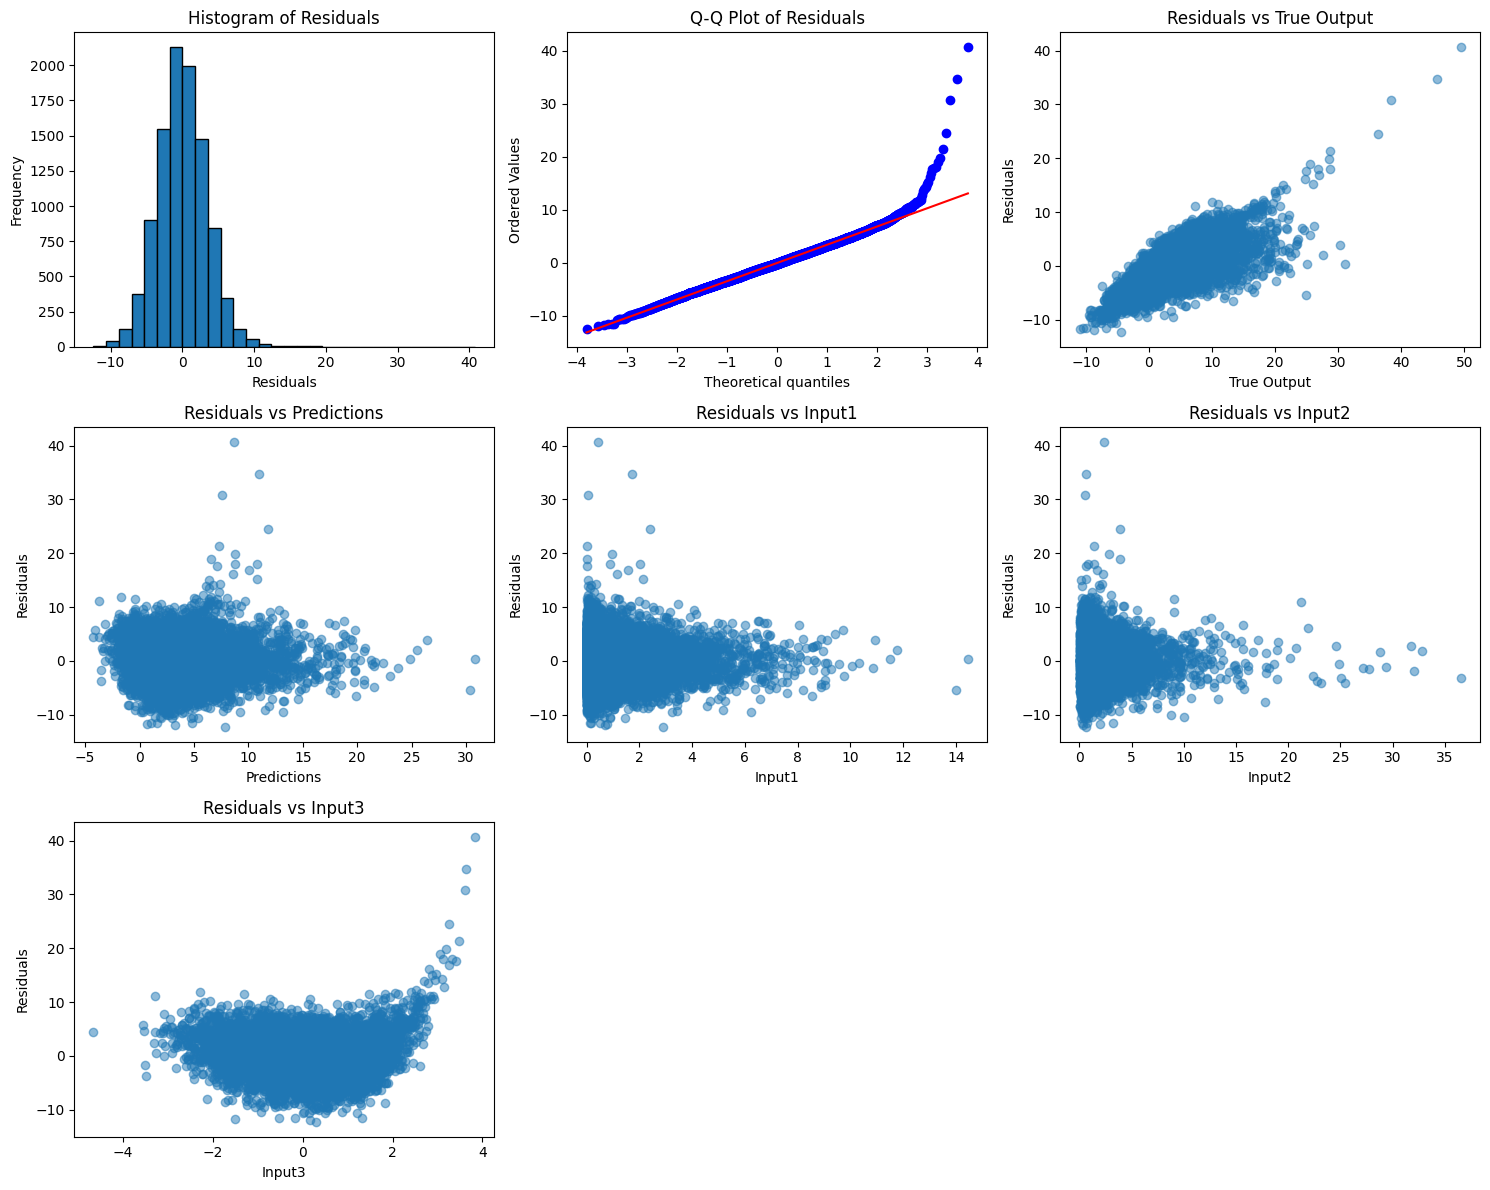

In [233]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")
data_transf["Predictions"] = linreg.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [234]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [235]:
'''# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)'''

'# Load the dataset\nurl = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"\ndata = pd.read_csv(url)\n\n\ny = data[\'charges\'].values\nX = data.drop(columns=[\'charges\']).values\n\n# Preprocess the data\n# Identify categorical columns for one-hot encoding\ncategorical_columns = [data.columns.get_loc(col) for col in [\'sex\', \'smoker\', \'region\']]\n\n# One-hot encode categorical variables\nX_encoded = one_hot_encode(X, categorical_columns, drop_first=True)\nX_encoded = X_encoded.astype(float)                                  # Watch out for this!\n\n# Instantiate and fit the LinearRegressor\nmodel = LinearRegressor()\nmodel.fit(X_encoded, y)\n\n# Predict and evaluate\ny_pred = model.predict(X_encoded)\nevaluation_metrics = evaluate_regression(y, y_pred)\nprint(evaluation_metrics)'

Compare yourself with scikit

In [236]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# One-hot encode categorical variables with pd.get_dummies
data_encoded = pd.get_dummies(
    data, 
    columns=['sex', 'smoker', 'region'],  # specify the categorical columns
    drop_first=True                       # drop the first category to avoid dummy trap
)

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the entire dataset (no separate train/test here)
model.fit(X, y)

# Make predictions on the same data (for demonstration)
y_pred = model.predict(X)

# Evaluate the model (assuming you have a function evaluate_regression)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7509130345985205, 'RMSE': 6041.679651174452, 'MAE': 4170.886894163586}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

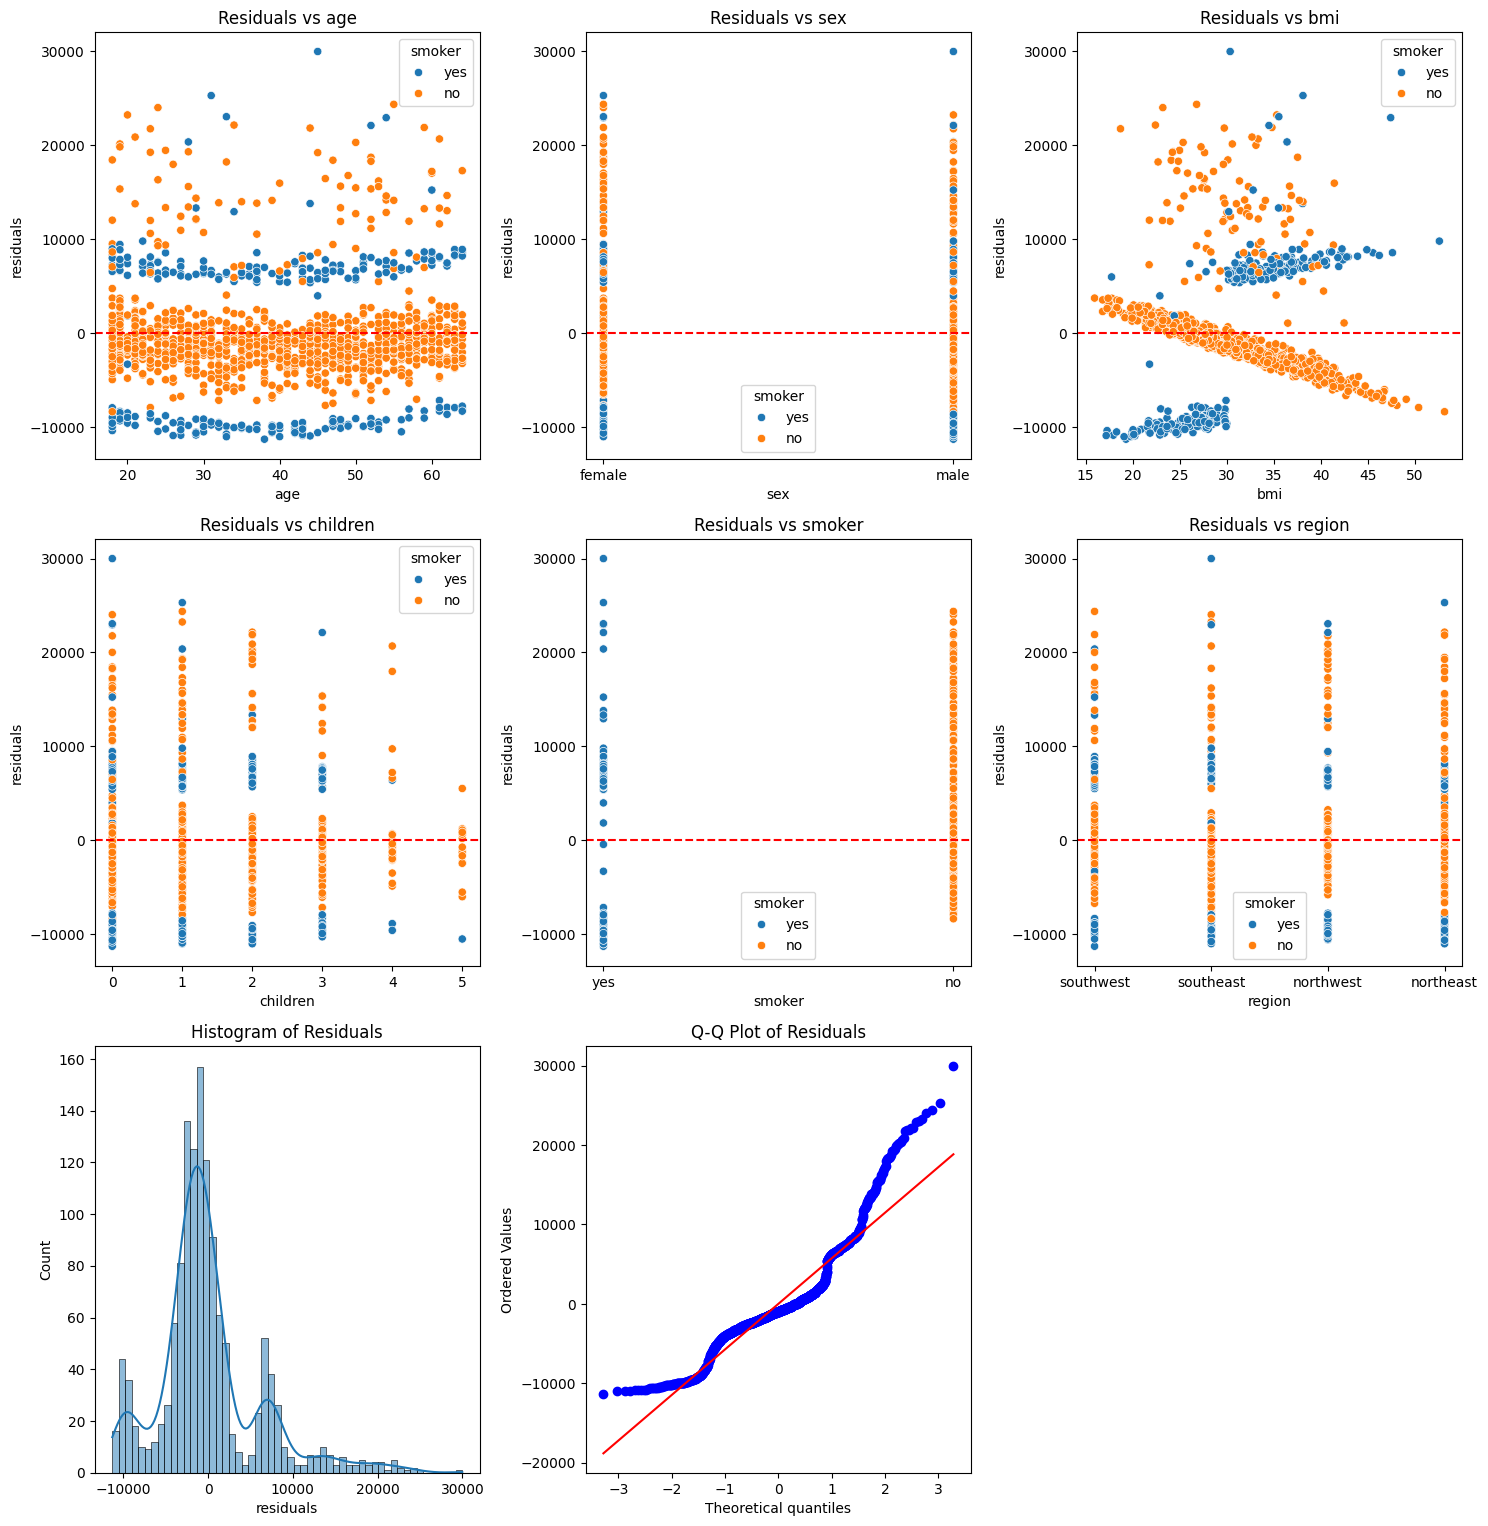

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # 1) Calculate residuals = y_true - y_pred
    data["residuals"] = data[output_column] - data[prediction_column]

    # 2) Identify columns to plot (excluding the output, prediction, and residuals columns)
    columns_to_plot = [
        col for col in data.columns 
        if col not in [output_column, prediction_column, "residuals"]
    ]

    # 3) Number of rows and columns for the subplot grid
    n_cols = 3
    # +2 rows: one for histogram, one for Q-Q plot
    n_rows = int(len(columns_to_plot) / n_cols) + 2

    # 4) Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()  # Flatten for easy indexing

    # 5) Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        if categorical_var and categorical_var in data.columns:
            sns.scatterplot(
                x=col, y="residuals", 
                data=data, ax=ax,
                hue=categorical_var
            )
        else:
            sns.scatterplot(
                x=col, y="residuals", 
                data=data, ax=ax
            )
        ax.set_title(f"Residuals vs {col}")
        ax.axhline(0, ls="--", color="red")

    # 6) Histogram of residuals
    # The next subplot index is i + 1
    sns.histplot(data["residuals"], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title("Histogram of Residuals")

    # 7) QQ-plot of residuals
    # The next subplot index is i + 2
    stats.probplot(data["residuals"], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title("Q-Q Plot of Residuals")

    # 8) Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> Dispersión vs. variables de entrada:
Se notan diferencias claras en los residuos según la variable “smoker”: el modelo tiende a subestimar o sobreestimar ciertos grupos (fumadores vs. no fumadores).
En “bmi” y “age” también se ve que los puntos se agrupan o muestran tendencias, lo que sugiere que la relación no es puramente lineal (o que falta alguna interacción).

Histograma y Q-Q plot de residuos:
El histograma no luce centrado y con forma normal perfecta; posiblemente haya colas largas o asimetría.
El Q-Q plot se desvía de la línea diagonal, indicando que los residuos no siguen una distribución normal, tal vez con colas pesadas o outliers.


# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks